In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


IDs: MB 307; TK 337 \
https://docs.google.com/spreadsheets/d/15e1K0tg5ponA5R6YQkZfihrShTDLAKf5qeKaoVCiuhQ/edit#gid=0

In [4]:
#Team name, using IDs above: mlcourse_ai_fall2019_team_<id1>_…<id4> 

In [5]:
train_X = pd.read_csv('/Users/m/Insight/MLcourse/Dota/train_features.csv', index_col='match_id_hash')
train_X.head(2)

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.0,0,0,0,0,0.0,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.0,0,0,0,0,0.0,0,0,0,0


In [6]:
train_X.isna().sum().sum()

0

There are no missing values in the data. 30 variables have type float. The rest are of integer type, which can, in fact be categorical (ordinal and not ordinal) data. We can look at the distribution of the values trying to spot any outliers. 

In [7]:
target = pd.read_csv('/Users/m/Insight/MLcourse/Dota/train_targets.csv', index_col = 'match_id_hash')

In [8]:
y = target['radiant_win']

In [9]:
full_df = train_X.merge(y, how='outer', left_index=True, right_index=True)

In [10]:
full_df.head(2)

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,radiant_win
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,False
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0,0,0,0,0.0,0,0,0,0,True


In [11]:
test_X = pd.read_csv('/Users/m/Insight/MLcourse/Dota/test_features.csv', index_col = 'match_id_hash')

In [12]:
train_test_feat = pd.concat([train_X,test_X])
train_test_feat.head(2)

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.0,0,0,0,0,0.0,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.0,0,0,0,0,0.0,0,0,0,0


### Creating new features

In [13]:
def select_cols_n_distinct(data,min,max):
    '''select columns in data frame with number of 
    distinct values between min and max, inclusive'''
    cols = []
    for col in data.columns.values:
        unique_vals = data[col].value_counts().shape[0]
        if unique_vals >= min and unique_vals <= max:
            #cols.append((col,unique_vals))
            cols.append(col)
    return cols    

In [14]:
select_cols_n_distinct(train_X,2,2);

In [15]:
radiant_win_T = full_df[full_df['radiant_win'] == 1]['lobby_type']
radiant_win_F = full_df[full_df['radiant_win'] == 0]['lobby_type']
#sns.distplot(radiant_win_T, bins=100, label='R won')
#sns.distplot(radiant_win_F, bins=100, label='R lost')
#plt.xlim(1900, 2020)
#plt.legend()

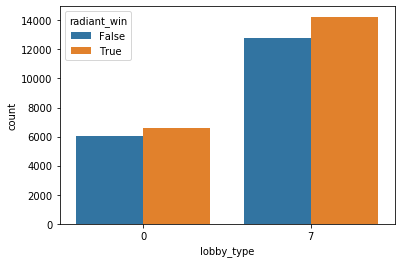

In [16]:
sns.countplot(x="lobby_type", hue="radiant_win", data=full_df);

In [17]:
new_features = pd.DataFrame(index=train_test_feat.index)

In [18]:
new_feats = [i.replace("1","")  for i in train_X.columns.values if (i.startswith('r1')==1 
                                                                    or i.startswith('d1')==1)]


Create a feature that is sum of r1 + ... + r5 for all r features, and same for all d features. Note that not all of these make sense, so some should be removed.

In [19]:
for feature in new_feats:
    feat_names = [(feature[0] + '{}_'.format(i) +feature[2:]) for i in range(1,6)]
    new_features[feature] = train_test_feat.loc[:,feat_names].sum(axis=1)

In [20]:
new_features.columns
new_features.isnull().sum().sum()

0

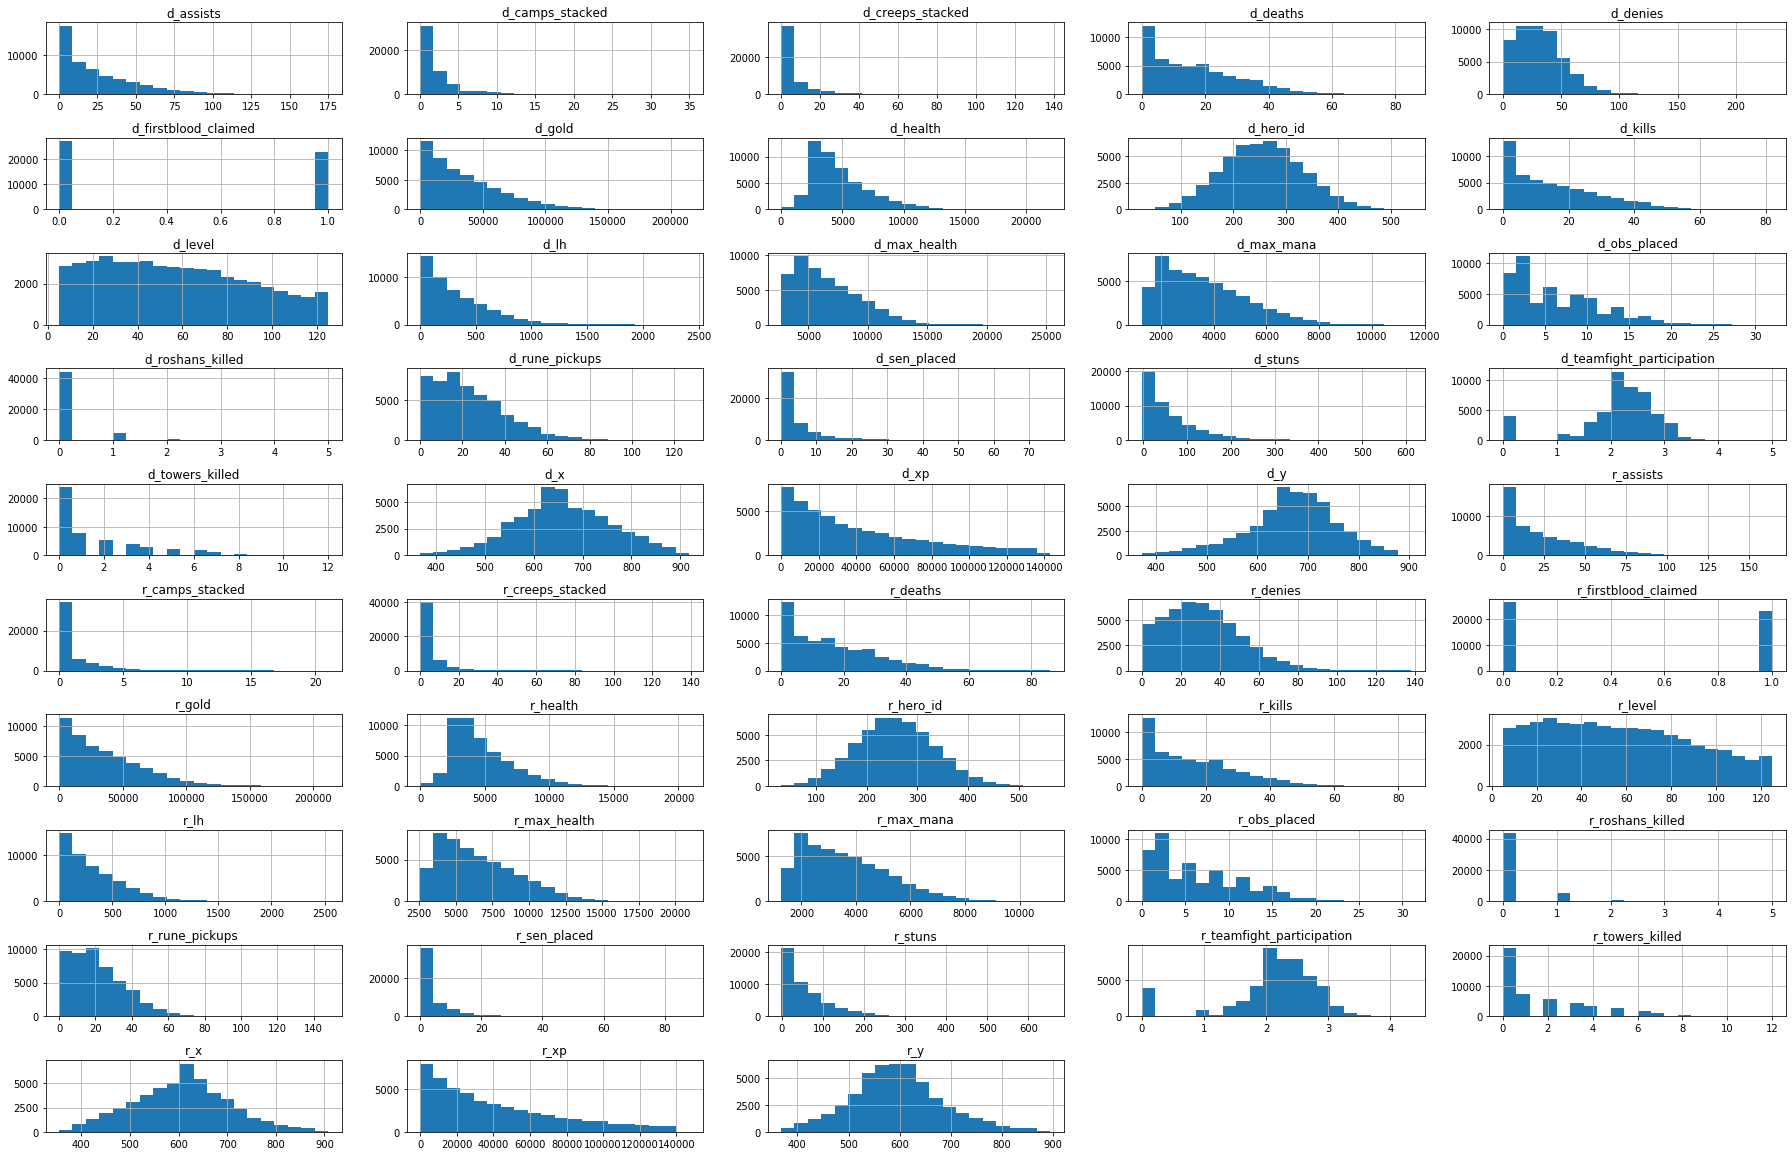

In [21]:
#new_features.drop('target',axis=1).hist(figsize = (25,80),layout = (50,5), bins=20)
new_features.hist(figsize = (25,80),layout = (50,5), bins=20)
plt.tight_layout()
plt.show()

Conclusions about categorical variables:
* firstblood_claimed : categorical, binary
* game_mode: categorical, non-ordinal --> needs to be converted to dummy variables
* lobby_type: categorical, binary (value 7 chould be changes with 1)
* hero_id: categorical, non-ordinal (too many levels)
* level: categorical, ordinal (25 levels)
* x,y are coordinates of players

## Combine old and new features

In [22]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
all_feats = train_test_feat.merge(new_features, how='outer', left_index=True, right_index = True)

In [24]:
all_feats.isnull().sum().sum()

0

In [25]:
all_feats.shape

(49675, 293)

### Split `all_features` into train and test data

In [26]:
ind = train_X.shape[0]
all_feats_train = all_feats.iloc[:ind,]
all_feats_test = all_feats.iloc[ind:,:]
print(all_feats_train.shape)
print(all_feats_test.shape)

(39675, 293)
(10000, 293)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(all_feats_train, y, test_size=.3, 
                                                    stratify=y)

In [28]:
X_train.shape

(27772, 293)

In [29]:
y_train.shape

(27772,)

In [30]:
pd.DataFrame(y_train).isnull().sum()

radiant_win    0
dtype: int64

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn_pandas import DataFrameMapper

In [32]:
cat_feats = select_cols_n_distinct(all_feats,2,3)
cat_feats.append('game_mode')
#cat_feats

In [33]:
#ord_feats = select_cols_n_distinct(all_feats,4,30)
#ord_feats.remove('game_mode')

In [34]:
num_feats = [feature for feature in all_feats.columns.values if feature not in cat_feats]
#num_feats = [feature for feature in all_feats.columns.values if feature not in ord_feats]

In [57]:
from lightgbm import LGBMClassifier

In [55]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier

class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]
    
    

pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(Columns(names=num_feats),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=cat_feats),OneHotEncoder(sparse=False)))
    ])),
    #('logreg', LogisticRegression(C=1))])
    ('lgbm', LGBMClassifier(n_jobs=-1))])

In [59]:
from sklearn.model_selection import cross_val_predict

In [60]:
cv_pred = cross_val_predict(pipe, 
                             X_train, 
                             y_train, 
                             cv=5,
                             method="predict_proba")

In [61]:
print("Cross validation AUC {:.4f}".format(roc_auc_score(y_train, cv_pred[:,1])))

Cross validation AUC 0.8049


Note: PCA decreases both metrics and position on leaderboard; RF also decreased leaderboard position, over logreg (best so far).\
`cross_val_predict` gives ROC AUC 0.8132 for logistic regression. ROC AUS 0.8049 for lightGBM (untuned)

In [63]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric', Pipeline(memory=None,
     steps=[('columns', Columns(names=['game_time', 'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_...0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0))])

In [64]:
predicted = pipe.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [65]:
print(accuracy_score(y_test, predicted))

0.7162059984877762


In [66]:
print(roc_auc_score(y_test,predicted))

0.7142411194924551


### Preparing submission

In [67]:
X_test_vals = all_feats_test.values
y_test_pred = pipe.predict_proba(X_test_vals)[:, 1]

df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred}, 
                                 index=all_feats_test.index)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [50]:
X_test_vals.shape

NameError: name 'X_test_vals' is not defined

In [230]:
df_submission.head(2)

,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.536
70e5ba30f367cea48793b9003fab9d38,0.898


In [150]:
import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

Submission saved to submission_2019-11-06_15-02-54.csv


In [56]:
from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (num_feats, StandardScaler()),
    (cat_feats, OneHotEncoder()))



/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:751: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [58]:
pipe2 = make_pipeline(
    preprocess,
   # StandardScaler(),
    LGBMClassifier(n_jobs=-1)
)